In [51]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [52]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

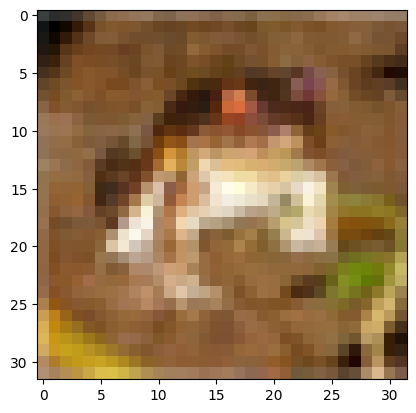

In [53]:
plt.imshow(x_train[0])

In [54]:
num_classes = 10

In [55]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [56]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [57]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [58]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
input_shape=x_train.shape[1:]
input_shape

(32, 32, 3)

In [60]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, input_shape = input_shape, kernel_size=(3, 3), activation = 'relu', padding = 'same'))

cnn.add(Conv2D(filters = 48, input_shape = input_shape, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 80, input_shape = input_shape, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 100, input_shape = input_shape, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
cnn.add(GlobalMaxPooling2D())
cnn.add(Dropout(0.25))

cnn.add(Dense(500))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

In [61]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.001)

# Let's train the model using RMSprop
cnn.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 48)        13872     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 48)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 80)        34640     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 80)          0         
 g2D)                                                 

In [62]:
#Normalizing the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [63]:
cnn_model1 = cnn.fit(x_train, y_train,batch_size=32,epochs=50,validation_data=(x_test, y_test),shuffle=True)


Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 1.7024 - accuracy: 0.3605 - val_loss: 1.3310 - val_accuracy: 0.5102
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3192 - accuracy: 0.5190 - val_loss: 1.1229 - val_accuracy: 0.6040
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1639 - accuracy: 0.5776 - val_loss: 1.0213 - val_accuracy: 0.6339
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0762 - accuracy: 0.6151 - val_loss: 0.9055 - val_accuracy: 0.6792
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0177 - accuracy: 0.6387 - val_loss: 0.8783 - val_accuracy: 0.6954
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9702 - accuracy: 0.6568 - val_loss: 0.8763 - val_accuracy: 0.7042
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9441 - accuracy: 0.6654 - val_loss: 0.8102 - val_ac

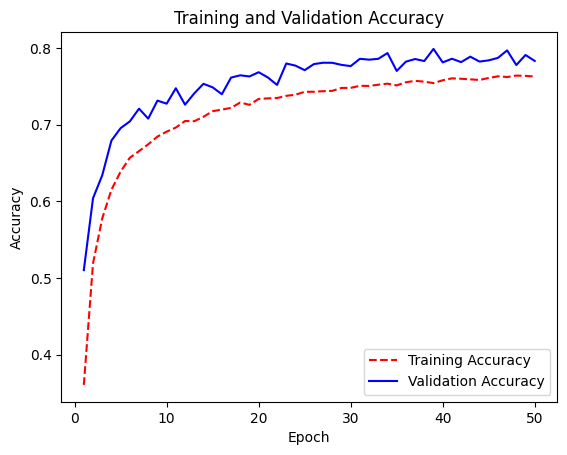

In [64]:
import matplotlib.pyplot as plt

# Get training and validation accuracy values
train_acc = cnn_model1.history['accuracy']
val_acc = cnn_model1.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(train_acc) + 1)

# Visualize accuracy history
plt.plot(epoch_count, train_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

It looks like your model's performance after 50 epochs is as follows:

Training loss: 0.6730
Training accuracy: 76.28%
Validation loss: 0.6383
Validation accuracy: 78.30%
This indicates that the model is performing reasonably well.